In [1]:
import pandas as pd
import json

dfs = []

for i in range(1, 44):
    url = f"../data/people/people_{i}0.json"
    with open(url, 'r') as f:
        data = json.load(f)
        dfs.append(pd.read_json(json.dumps(data)))

df_orig = pd.concat(dfs)

In [155]:
df = df_orig

In [159]:
df['death_month']

0       False
1       False
3       False
4       False
6       False
        ...  
1962    False
1970    False
1972    False
1974    False
1999    False
Name: death_month, Length: 20904, dtype: bool

In [5]:
%load_ext autoreload
%autoreload 2

In [135]:
import sys
sys.path.insert(0, '../')
from preprocessing.utilities2 import preprocess_data

In [160]:
df = preprocess_data(df)
df.shape

The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of 

(9746, 332)

In [161]:
import matplotlib.pyplot as plt
nonzero_deaths = df[df['death_cause'] != 0]['death_cause']

# Print the selected rows
print(nonzero_deaths)

3         Suicide by Poisoning
10      Execution by Beheading
12                      Stroke
17        Execution by Hanging
18      Execution by Beheading
                 ...          
1150              Car Accident
1412                    Murder
1664         Murder by Gunshot
1866                  Accident
1999                    Murder
Name: death_cause, Length: 4119, dtype: object


In [168]:
# Select rows where death_cause is not 0
df = df[df['death_cause'] != 0]

df = df[pd.to_numeric(df['death_year'], errors='coerce').notnull() & pd.to_numeric(df['birth_year'], errors='coerce').notnull()]

In [171]:
df["death_year"].unique()

df["age_death"] = df["death_year"].astype(int) - df["birth_year"].astype(int)

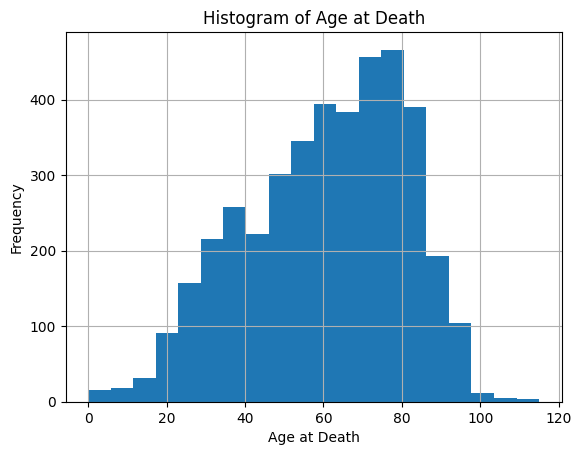

In [173]:
df['age_death'].hist(bins=20)
plt.xlabel('Age at Death')
plt.ylabel('Frequency')
plt.title('Histogram of Age at Death')
plt.show()

In [174]:
cause_counts = df['death_cause'].value_counts()

# Get the top 3 most common death causes
top_causes = cause_counts[:3].index

# Select the rows that don't contain the top 3 death causes
filtered_df = df[~df['death_cause'].isin(top_causes)]

# Print the filtered DataFrame
print(filtered_df)

                          name  birth_year mercury_sign  mercury_house  \
3            Thomas Chatterton        1752  Sagittarius              1   
10    King of France Louis XVI        1754        Virgo             12   
12               Georg Forster        1754  Sagittarius              6   
17                 Nathan Hale        1755       Gemini             12   
18           Anacharsis Cloots        1755       Cancer             12   
...                        ...         ...          ...            ...   
1150                   Chalino        1984       Taurus             12   
1412         Gerri Ann Richard        1984       Cancer              2   
1664         Martin L. Brunolt        1984        Virgo             11   
1866            Gaspard Ulliel        1984  Sagittarius              9   
1999       Christielle Burbach        1985  Sagittarius              9   

      mercury_retrograde   venus_sign  venus_house    mars_sign  mars_house  \
3                    0.0  Sagitt

In [175]:
# Assume that you have a DataFrame named 'df' with a 'death_cause' column
keysArray = [
    {'cause': 'suicide', 'deaths': ['Suicide by Poisoning', 'Suicide by Hanging', 'Suicide', 'Suicide by Gunshot']},
    {'cause': 'execution', 'deaths': ['Execution', 'Execution by Electric Chair', 'Execution by Gunshot', 'Execution by Beheading', 'Execution by Lethal injection', 'Execution by Hanging']},
    {'cause': 'war', 'deaths': ['War Casualties', 'Casualties of World War I', 'Terrorism']},
    {'cause': 'booze', 'deaths': ['Cirrhosis', 'Liver Failure', 'Alcohol']},
    {'cause': 'losing it', 'deaths': ["Parkinson's disease", "Alzheimer's Disease", 'Brain Failure', 'Multiple Sclerosis', 'AIDS']},
    {'cause': 'OD', 'deaths': ['Pill Overdose', 'Drug Overdose']},
    {'cause': 'mystery', 'deaths': ['Unclear cause']},
    {'cause': 'some ancient shit', 'deaths': ['Syphilis', 'Influenza', 'Fever', 'Tuberculosis']},
    {'cause': 'murder', 'deaths': ['Murder', 'Murder by Gunshot', 'Victims of Assassination']},
    {'cause': 'boring', 'deaths': ['Asthma', 'Pneumonia', 'Leukemia', 'Heart Failure', 'Stroke', 'Respiratory/Lung Failure', 'Diabetes', 'Kidney Failure', 'Aneurysm']},
    {'cause': 'accident', 'deaths': ['Fall', 'Drowning', 'Injury', 'Accident', 'Aviation Accident', 'Car Accident']}
]

# Define a mapping function that maps each death cause to a corresponding cause in keysArray
def map_death_cause(death_cause):
    for key in keysArray:
        if death_cause in key['deaths']:
            return key['cause']
    print("oh shittt", death_cause)
    return 'houston'

# Create the new column using the map function
filtered_df['death_cause_umbrella'] = filtered_df['death_cause'].map(map_death_cause)

/tmp/ipykernel_21878/1881174838.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['death_cause_umbrella'] = filtered_df['death_cause'].map(map_death_cause)


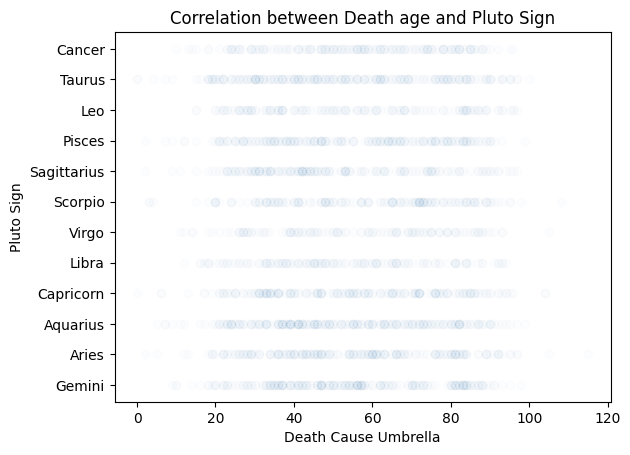

In [187]:
# Assume that you have a DataFrame named 'df' with columns 'death_cause_umbrella' and 'pluto_house'
x = filtered_df['age_death']
y = filtered_df['house_8_sign']

plt.scatter(x, y, alpha=0.01)
plt.title('Correlation between Death age and Pluto Sign')
plt.xlabel('Death Cause Umbrella')
plt.ylabel('Pluto Sign')
plt.show()

In [185]:
filtered_df.shape

(2243, 334)

In [191]:
df = filtered_df


In [192]:
df

,name,birth_year,mercury_sign,mercury_house,mercury_retrograde,venus_sign,venus_house,mars_sign,mars_house,sun_sign,...,house_AC_pluto_trine,house_AC_pluto_opposition,house_AC_sun_angle,house_AC_sun_conjunction,house_AC_sun_sextile,house_AC_sun_square,house_AC_sun_trine,house_AC_sun_opposition,age_death,death_cause_umbrella
3,Thomas Chatterton,1752,Sagittarius,1,0.0,Sagittarius,2,Scorpio,12,Scorpio,...,0,0,14.08,0,0,0,0,0,18,suicide
10,King of France Louis XVI,1754,Virgo,12,1.0,Libra,2,Virgo,1,Leo,...,0,0,13.93,0,0,0,0,0,39,execution
12,Georg Forster,1754,Sagittarius,6,0.0,Capricorn,6,Scorpio,5,Sagittarius,...,0,0,126.83,0,0,0,0,0,40,boring
17,Nathan Hale,1755,Gemini,12,0.0,Taurus,11,Aries,11,Gemini,...,0,0,7.42,0,0,0,0,0,21,execution
18,Anacharsis Cloots,1755,Cancer,12,0.0,Taurus,11,Taurus,10,Cancer,...,0,0,26.00,0,0,0,0,0,39,execution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,Chalino,1984,Taurus,12,1.0,Aries,11,Scorpio,7,Aries,...,0,0,30.57,0,0,0,0,0,20,accident
1412,Gerri Ann Richard,1984,Cancer,2,0.0,Cancer,2,Scorpio,6,Cancer,...,0,0,21.96,0,0,0,0,0,0,murder
1664,Martin L. Brunolt,1984,Virgo,11,0.0,Libra,12,Sagittarius,2,Libra,...,0,0,32.55,0,0,0,0,0,10,murder
1866,Gaspard Ulliel,1984,Sagittarius,9,0.0,Capricorn,10,Aquarius,11,Sagittarius,...,0,0,233.88,0,0,0,0,0,38,accident


In [10]:
for col in df.columns:
    print(col)

name
mercury_sign
mercury_house
mercury_retrograde
venus_sign
venus_house
mars_sign
mars_house
sun_sign
sun_house
moon_sign
moon_house
jupiter_sign
jupiter_house
saturn_sign
saturn_house
uranus_sign
uranus_house
neptune_sign
neptune_house
neptune_retrograde
pluto_sign
pluto_house
house_AC_sign
house_2_sign
house_3_sign
house_IC_sign
house_5_sign
house_6_sign
house_DC_sign
house_8_sign
house_9_sign
house_MC_sign
house_11_sign
house_12_sign
uranus_retrograde
jupiter_retrograde
pluto_retrograde
saturn_retrograde
venus_retrograde
mars_retrograde
mercury_venus_conjunction
mercury_venus_sextile
mercury_venus_square
mercury_venus_trine
mercury_venus_opposition
mercury_mars_conjunction
mercury_mars_sextile
mercury_mars_square
mercury_mars_trine
mercury_mars_opposition
mercury_jupiter_conjunction
mercury_jupiter_sextile
mercury_jupiter_square
mercury_jupiter_trine
mercury_jupiter_opposition
mercury_saturn_conjunction
mercury_saturn_sextile
mercury_saturn_square
mercury_saturn_trine
mercury_satu

In [275]:
new_df = pd.DataFrame()

new_df['mars_pluto_opposition'] = df['mars_pluto_opposition'].apply(lambda x: 1 if x == 1 else 0)
new_df['mars_pluto_square'] = df['mars_pluto_square'].apply(lambda x: 1 if x == 1 else 0)
new_df['uranus_house'] = df['uranus_house'].apply(lambda x: 1 if x == 8 else 0)
new_df['pluto_house'] = df['pluto_house'].apply(lambda x: 1 if x == 8 else 0)
new_df['moon_pluto_square'] = df['moon_pluto_square'].apply(lambda x: 1 if x == 1 else 0)
new_df['saturn_house'] = df['saturn_house'].apply(lambda x: 1 if x in [1, 8, 12] else 0)
new_df['mars_sun_opposition'] = df['mars_sun_opposition'].apply(lambda x: 1 if x == 1 else 0)
new_df['house_AC_pluto_conjunction'] = df['house_AC_pluto_conjunction'].apply(lambda x: 1 if x else 0)

new_df['death_cause_umbrella'] = df['death_cause_umbrella']

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X = new_df.iloc[:, :-1]  # input variables
y = new_df['death_cause_umbrella']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = rf.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.26057906458797325


In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.28444261056315623


In [202]:
from sklearn.metrics import f1_score

# create the random forest classifier with best parameters
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=3, min_samples_split=5)

# train the classifier on the training set
rf_clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf_clf.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Accuracy: 0.26, Precision: 0.07, Recall: 0.26, F1-score: 0.11


/home/outisfun/.pyenv/versions/3.10.6/envs/outenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:

# # Split the death_cause column into binary columns using one-hot encoding
# target_cols = ['death_cause_umbrella_OD', 'death_cause_umbrella_accident', 'death_cause_umbrella_booze',
#                'death_cause_umbrella_boring', 'death_cause_umbrella_execution', 'death_cause_umbrella_losing it',
#                'death_cause_umbrella_murder', 'death_cause_umbrella_mystery', 'death_cause_umbrella_some ancient shit',
#                'death_cause_umbrella_suicide', 'death_cause_umbrella_war']

# data = pd.get_dummies(new_df, columns=['death_cause_umbrella'])

# # # Separate the input features from the target variables
# X = data.drop(target_cols, axis=1)
# y = data[target_cols]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a random forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Predict on the test set and calculate accuracy
# y_pred = rf.predict(X_test)
# accuracy = (y_pred == y_test).mean()
# print('Accuracy:', accuracy)

# X.columns

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
type(y_train)

pandas.core.series.Series

In [280]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

y = new_df["death_cause_umbrella"]
# Encode the class labels as integers

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# Convert the integer-encoded class labels to one-hot vectors
num_classes = len(np.unique(encoded_y))
one_hot_y = np_utils.to_categorical(encoded_y, num_classes)

In [281]:
print(len(encoded_y))

2243


In [283]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X, one_hot_y)

# Define a new entry to predict
new_entry = np.array([[0, 1, 0, 1, 0, 1, 0, 1]])

# Make a prediction for the new entry
prediction = rf.predict_proba(new_entry)

# Get the predicted class label
predicted_class = encoder.inverse_transform([np.argmax(prediction)])[0]

print(f"The predicted class label is: {predicted_class}")

/home/outisfun/.pyenv/versions/3.10.6/envs/outenv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: y contains previously unseen labels: [14]

In [296]:
type(X)

pandas.core.frame.DataFrame

In [294]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# Convert the integer-encoded class labels to one-hot vectors
num_classes = len(np.unique(encoded_y))
one_hot_y = np_utils.to_categorical(encoded_y, num_classes)

# Train a random forest classifier with a softmax output layer
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X, one_hot_y)

# Define a new entry to predict
new_entry = np.array([[0, 1, 0, 1, 0, 1, 0, 1]])

# Make a prediction for the new entry
prediction = rf.predict_proba(new_entry)

# Get the predicted class label
predicted_class = encoder.inverse_transform([np.argmax(prediction)])[0]

print(f"The predicted class label is: {predicted_class}")

/home/outisfun/.pyenv/versions/3.10.6/envs/outenv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: y contains previously unseen labels: [14]

In [56]:
X_pca_train.shape

(20894, 50)

In [78]:
closest_indices

array([453, 451, 549])

In [83]:
names = names.reset_index(drop=True)

names

In [257]:
names[453]
names[451]
last_10_names = last_10_names.reset_index(drop=True)
last_10_names[0]

NameError: name 'names' is not defined